In [101]:
# https://lvngd.com/blog/generating-and-solving-sudoku-puzzles-python/
# https://gist.github.com/lvngd/8c1aafc4851985bbd239bc59153f26f9
# https://www.cnblogs.com/grandyang/p/4421852.html
import random
import copy
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
class Sudoku():
    def __init__(self):
        self.grid = [[0 for i in range(9)] for j in range(9)]
        self.initial_game()
        self.original = copy.deepcopy(self.grid)
        
    def initial_game(self):
        """
        Generate a solution of a random sudoku game.
        """
        row = [set() for _ in range(9)]
        col = [set() for _ in range(9)]
        box = [[set() for _ in range(3)] for _ in range(3)]
        for i in range(9):
            for j in range(9):
                if self.grid[i][j] != 0:
                    tmp = self.grid[i][j]
                    row[i].add(tmp)
                    col[j].add(tmp)
                    box[i//3][j//3].add(tmp)

        def isvalid(grid, i, j, val):
            if val in row[i] or val in col[j] or val in box[i//3][j//3]:
                return False
            return True
        
        def helper(grid,i,j):
            if i==9:
                return True
            if j>=9: 
                return helper(self.grid, i+1, 0)
            if self.grid[i][j] != 0:
                return helper(self.grid, i, j+1)
            
            num_list = [1,2,3,4,5,6,7,8,9]
            random.shuffle(num_list)
            
            for c in num_list:
                if not isvalid(self.grid,i,j,c):
                    continue
                self.grid[i][j] = c
                row[i].add(c)
                col[j].add(c)
                box[i//3][j//3].add(c)
                if helper(self.grid, i, j+1):
                    return True
                
                self.grid[i][j] = 0
                row[i].remove(c)
                col[j].remove(c)
                box[i//3][j//3].remove(c)
                
            return False
        
        helper(self.grid, 0, 0)      
        return 
        
    def remove_num(self, level):
        non_empty = []
        for i in range(9):
            for j in range(9):
                if self.grid[i][j] != 0:
                    non_empty.append((i,j))
        
        random.shuffle(non_empty)
        
        box_count = len(non_empty)
        rounds = 3
        
        while rounds > 0 and box_count >= level:
            r, c = non_empty.pop()
            box_count -= 1
            tmp = self.grid[r][c]
            tmp_grid = copy.deepcopy(self.grid)
            tmp_grid[r][c] = 0
            full_grid = self.sol_1(tmp_grid)
            if full_grid != self.original:
                self.grid[r][c] = tmp
                box_count += 1
                rounds -= 1
            else:
                self.grid[r][c] = 0

        return
    

    
    def sol_1(self, ingrid):
        """
        DFS + backtracking + with i, j position.
        """
        board = copy.deepcopy(ingrid)
        row = [set() for _ in range(9)]
        col = [set() for _ in range(9)]
        box = [[set() for _ in range(3)] for _ in range(3)]
        for i in range(9):
            for j in range(9):
                if board[i][j] != 0:
                    tmp = board[i][j]
                    row[i].add(tmp)
                    col[j].add(tmp)
                    box[i//3][j//3].add(tmp)

        def isvalid(board, i, j, val):
            if val in row[i] or val in col[j] or val in box[i//3][j//3]:
                return False
            return True
        
        def helper(board,i,j):
            if i==9:
                return True
            if j>=9: 
                return helper(board, i+1, 0)
            if board[i][j] != 0:
                return helper(board, i, j+1)
            
            for c in range(1,10):
                if not isvalid(board,i,j,c):
                    continue
                board[i][j] = c
                row[i].add(c)
                col[j].add(c)
                box[i//3][j//3].add(c)
                if helper(board, i, j+1):
                    return True
                
                board[i][j] = 0
                row[i].remove(c)
                col[j].remove(c)
                box[i//3][j//3].remove(c)
                
            return False
        
        helper(board, 0, 0)     
        return board
    
    def sol_2(self, ingrid):
        """
        DFS + backtracking + without i, j position.
        """
        board = copy.deepcopy(ingrid)
        row = [set() for _ in range(9)]
        col = col = [set() for _ in range(9)]
        box = [[set() for _ in range(3)] for _ in range(3)]
        for i in range(9):
            for j in range(9):
                if board[i][j] != 0:
                    tmp = board[i][j]
                    row[i].add(tmp)
                    col[j].add(tmp)
                    box[i//3][j//3].add(tmp)

        def isvalid(board, i, j, val):
            if val in row[i] or val in col[j] or val in box[i//3][j//3]:
                return False
            return True
        
        def helper():
            for i in range(9):
                for j in range(9):
                    if board[i][j] != 0: continue
                        
                    for c in range(1,10):
                        if not isvalid(board,i,j,c): continue
                        board[i][j] = c
                        row[i].add(c)
                        col[j].add(c)
                        box[i//3][j//3].add(c)
                        
                        if helper():
                            return True
                        board[i][j] = 0
                        row[i].remove(c)
                        col[j].remove(c)
                        box[i//3][j//3].remove(c)
                    
                    return False
            return True
        
        helper()
        return board

In [74]:
sol_1_time_hard = []
sol_2_time_hard = []
for i in range(50):
    game = Sudoku()
    game.remove_num(17)
    
    res_1 = game.grid
    t1 = time.time()
    res_1 = game.sol_1(res_1)
    t2 = time.time()
    t3 = t2 - t1
    
    res_2 = game.grid
    t4 = time.time()
    res_2 = game.sol_2(res_2)
    t5 = time.time()
    t6 = t5 - t4
    sol_1_time_hard.append(t3)
    sol_2_time_hard.append(t6)

In [75]:
sol_1_time_medium = []
sol_2_time_medium = []
for i in range(50):
    game = Sudoku()
    game.remove_num(25)
    
    res_1 = game.grid
    t1 = time.time()
    res_1 = game.sol_1(res_1)
    t2 = time.time()
    t3 = t2 - t1
    
    res_2 = game.grid
    t4 = time.time()
    res_2 = game.sol_2(res_2)
    t5 = time.time()
    t6 = t5 - t4
    sol_1_time_medium.append(t3)
    sol_2_time_medium.append(t6)

In [76]:
sol_1_time_easy = []
sol_2_time_easy = []
for i in range(50):
    game = Sudoku()
    game.remove_num(35)
    
    res_1 = game.grid
    t1 = time.time()
    res_1 = game.sol_1(res_1)
    t2 = time.time()
    t3 = t2 - t1
    
    res_2 = game.grid
    t4 = time.time()
    res_2 = game.sol_2(res_2)
    t5 = time.time()
    t6 = t5 - t4
    sol_1_time_easy.append(t3)
    sol_2_time_easy.append(t6)

In [77]:
result = pd.DataFrame(
    {'Sol_1_hard': sol_1_time_hard,
     'Sol_2_hard': sol_2_time_hard,
     'Sol_1_medium': sol_1_time_medium,
     'Sol_2_medium': sol_2_time_medium,
     'Sol_1_easy': sol_1_time_easy,
     'Sol_2_easy': sol_2_time_easy
    })

In [83]:
print(result.describe())

       Sol_1_hard  Sol_2_hard  Sol_1_medium  Sol_2_medium  Sol_1_easy  \
count   50.000000   50.000000     50.000000     50.000000   50.000000   
mean     0.027471    0.055985      0.013625      0.028763    0.003183   
std      0.093010    0.186522      0.022823      0.049465    0.006647   
min      0.000331    0.000633      0.000249      0.000550    0.000224   
25%      0.001931    0.003889      0.001292      0.002852    0.000539   
50%      0.005217    0.011617      0.003143      0.005827    0.000972   
75%      0.018919    0.037805      0.011605      0.026642    0.003331   
max      0.642258    1.278840      0.108507      0.260231    0.045088   

       Sol_2_easy  
count   50.000000  
mean     0.006530  
std      0.014573  
min      0.000482  
25%      0.001043  
50%      0.001830  
75%      0.006447  
max      0.100373  


<AxesSubplot:>

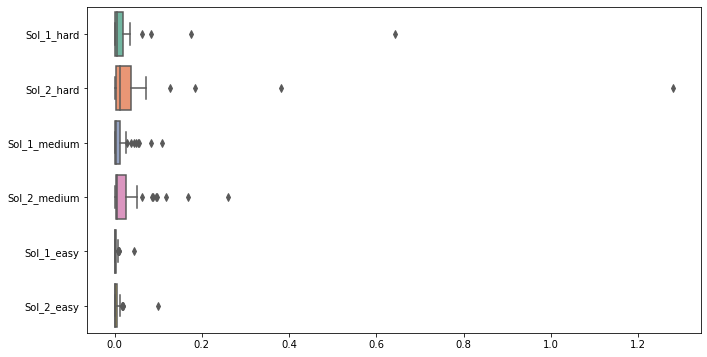

In [103]:
plt.figure(figsize=(11,6))
sns.boxplot(data=result, orient="h", palette="Set2")